# Hypothesis Testing
# Overview Exercises:

For each of the following questions: 
- Formulate a null and alternative hypothesis (be as specific as you can be)
- Then give an example of:
- What a true positive, True negative, Type I errors, Type II errors would look like. 

Probelm 1: Has the network latency gone up since we switched internet service providers?

- $H_{0}$ = Network latency or ping rate (milliseconds)(numeric) has not changed since the switch of service providers(boolean).
- $H_{α}$ = Network latency or ping rate (milliseconds)(numeric) has gone up since the switch of service providers(boolean).
- True Positive: 
- True Negative:
- Type I error:
- Type II error:

Problem 2: Is the website redesign any good?

- $H_{0}$ = 
- $H_{α}$ = 
- True Positive:
- True Negative:
- Type I error:
- Type II error:

Problem 3: Is our television ad driving more sales?

- $H_{0}$ = 
- $H_{α}$ = 
- True Positive:
- True Negative:
- Type I error:
- Type II error:

# T-test Exercises: 
# Problem 1:
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from env import get_db_url, user, password, host
from pydataset import data

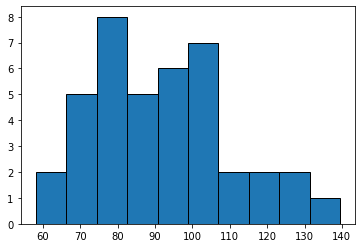

In [2]:
Off_1_observations = rows = 40
Off_1_μ = 90
Off_1_σ = 15
office_1 = pd.Series(stats.norm(90,15).rvs(40))

plt.hist(office_1,ec='black')
plt.show()

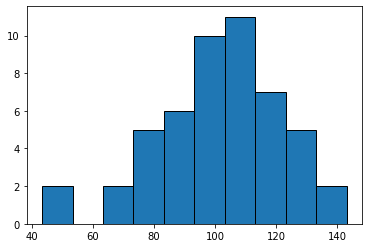

In [3]:
Off_2_observations = rows = 50
Off_2_μ = 100
Off_2_σ = 20
office_2 = pd.Series(stats.norm(100, 20).rvs(50))

plt.hist(office_2,ec='black')
plt.show()

$H_{0}$: Average time to sell a home did not change between two offices.

$H_{α}$: Average time did change between both offices. 

In [4]:
α = 0.05

In [5]:
# Verify assumptions
# At least 30 observations: Yes there are at least 30 observaitons in both sets
# Independent samples: Yes, they are both from different sets
# Equal variances: No, 

In [6]:
var_equal = office_1.var() ==  office_2.var()

In [7]:
tstat, pval = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = var_equal)
f'P = {pval}, P/2 = {pval/2}, α = {α}, T = {tstat}' 

'P = 0.00811206270346016, P/2 = 0.00405603135173008, α = 0.05, T = -2.7091418459143854'

In [8]:
########### Reassess ###########
if (pval/2 < α) and (tstat > 0):
    print(f'We can reject H0')
else:
    print(f'We cannot reject H0')

We cannot reject H0


The Null Hypothesis cannot be rejected.

# Problem 2: 

Load the mpg dataset and use it to answer the following questions:

In [9]:
mpg = data('mpg')
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [10]:
## Creating two seperate dataframes for each year to compare.

In [11]:
mpg_2008 = mpg[mpg.year == 2008]
mpg_1999 = mpg[mpg.year == 1999]

In [12]:
# Plot

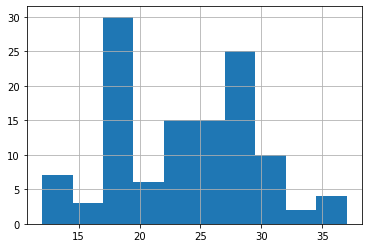

In [13]:
mpg_2008.hwy.hist()
plt.show()

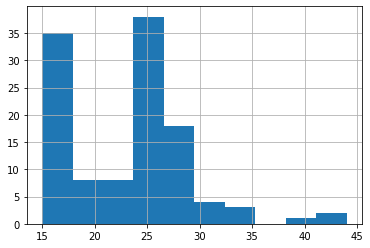

In [14]:
mpg_1999.hwy.hist()
plt.show()

In [15]:
## Hypothesis

- $H_{0}$ = There is no difference in fuel efficiency between 2008 and 1999 cars.
- $H_{1}$ = There is a difference in fuel efficiency between 2008 and 1999 cars.

In [16]:
## Alpha or Significance level
α = 0.05

In [17]:
##### Verify Assumption:
## Norm dist or at least 30?

least_30 = (len(mpg_2008) > 30) and (len(mpg_1999) > 30)
least_30

True

In [18]:
## Independent: Yes a vehicel cannot be made in two different years so far apart.

In [19]:
## Equal Variance?
l_tstat, l_p = stats.levene(mpg_2008.hwy ,mpg_1999.hwy)
var_equal = (l_p / 2 < 0.05) and (l_tstat > 0)
var_equal

False

In [20]:
## Compute tstat and pval
tstat, pval = stats.ttest_ind(mpg_2008.hwy, mpg_1999.hwy, equal_var = var_equal)
reject_hy = (pval / 2 < α) and (tstat > 0)
reject_hy

False

We cannot reject the hypothesis. ########## REASSESS

Are compact cars more fuel-efficient than the average car?

- plot
- hypothesis
- set alpha
- verify assumptions: norm dist or least 30, independent, equal var
- compute test stat and pval
- decide

Do manual cars get better gas mileage than automatic cars?

- plot
- hypothesis
- set alpha
- verify assumptions: norm dist or least 30, independent, equal var
- compute test stat and pval
- decide

# Correlation Exercises: 
Use the telco_churn data.

In [21]:
telco = pd.read_csv('telco_cust_dets.csv')
telco = telco [telco.Tenure != 0]
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,Tenure,Avg_monthly_charge,Contract Type,Phone Service,Internet Service,Tenure Rounded,Service Type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,9.044207,65.6,1 Year,One Line,DSL,9,Phone and Internet
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,9.055092,59.9,Month-to-Month,Two or More Lines,DSL,9,Phone and Internet
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,3.800406,73.9,Month-to-Month,One Line,Fiber Optic,3,Phone and Internet
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,12.631122,98,Month-to-Month,One Line,Fiber Optic,12,Phone and Internet
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,3.187128,83.9,Month-to-Month,One Line,Fiber Optic,3,Phone and Internet


Abbreviated Hypothesis Testing Procedure:

- Setup
- Calculate test statistic + p-value
- Conclude
- 𝛼 = 0.05 
- 𝐻0 : 
- 𝐻𝑎 : 

Problem 1: Does tenure correlate with monthly charges? 

In [22]:
telco[['Tenure','monthly_charges']]

,Tenure,monthly_charges
0,9.044207,65.60
1,9.055092,59.90
2,3.800406,73.90
3,12.631122,98.00
4,3.187128,83.90
...,...,...
7044,13.470535,55.15
7045,22.017626,85.10
7046,1.843936,50.30
7047,68.204127,67.85


<AxesSubplot:xlabel='monthly_charges', ylabel='Tenure'>

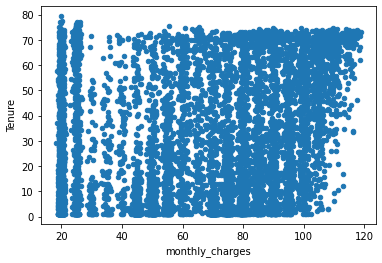

In [23]:
telco.plot.scatter(y = 'Tenure', x = 'monthly_charges')

In [24]:
y = telco.Tenure
x = telco.monthly_charges

In [25]:
r, p = stats.pearsonr(x, y)
r , p

(0.2461667830592631, 1.1952280772800575e-97)

Total charges? 

In [26]:
telco[['Tenure', 'total_charges']]

,Tenure,total_charges
0,9.044207,593.30
1,9.055092,542.40
2,3.800406,280.85
3,12.631122,1237.85
4,3.187128,267.40
...,...,...
7044,13.470535,742.90
7045,22.017626,1873.70
7046,1.843936,92.75
7047,68.204127,4627.65


<AxesSubplot:xlabel='Tenure', ylabel='total_charges'>

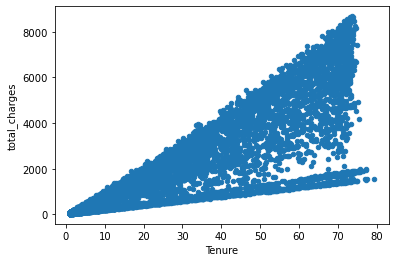

In [27]:
telco.plot.scatter(x = 'Tenure', y = 'total_charges')

In [28]:
y = telco.Tenure
x = telco.total_charges

In [29]:
r, p = stats.pearsonr(x , y)
r, p

(0.8258274352556676, 0.0)

What happens if you control for phone and internet service?

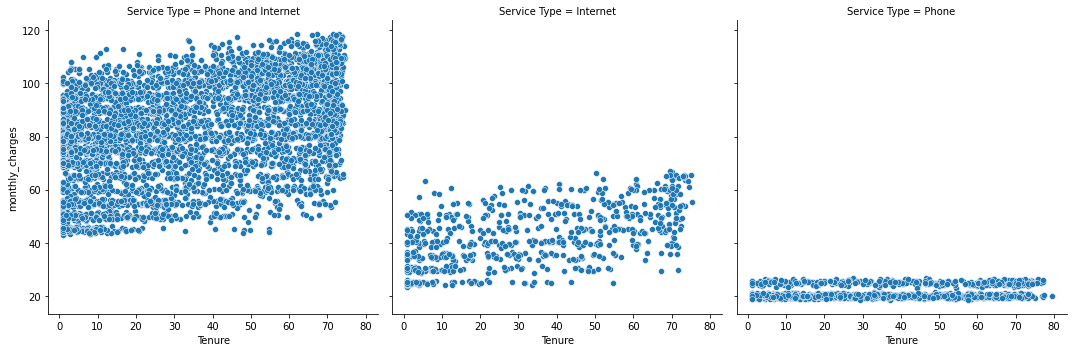

In [30]:
sns.relplot(data=telco, x = 'Tenure', y = 'monthly_charges', col = 'Service Type')

In [31]:
phone_internet = telco[telco['Service Type'] == 'Phone and Internet']
r, p = stats.pearsonr(phone_internet.Tenure, phone_internet.monthly_charges)
r, p

(0.44342558848854297, 4.9394115353004695e-232)

In [32]:
internet = telco[telco['Service Type'] == 'Internet']
r, p = stats.pearsonr(internet.Tenure, internet.monthly_charges)
r, p

(0.5929000576223008, 7.050238802215818e-66)

In [33]:
phone = telco[telco['Service Type'] == 'Phone']
r, p = stats.pearsonr(phone.Tenure, phone.monthly_charges)
r, p

(0.34630627233388506, 3.76146409297443e-44)

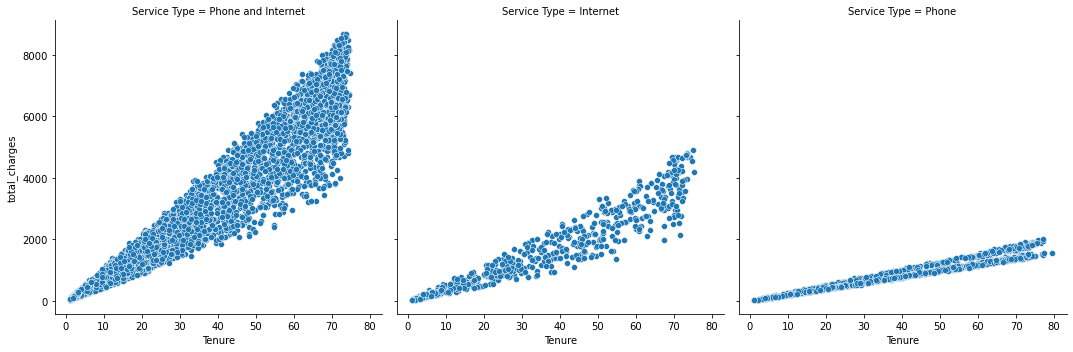

In [34]:
sns.relplot(data=telco, x = 'Tenure', y = 'total_charges', col = 'Service Type')

In [35]:
phone_internet = telco[telco['Service Type'] == 'Phone and Internet']
r, p = stats.pearsonr(phone_internet.Tenure, phone_internet.total_charges)
r, p

(0.9587705119513354, 0.0)

In [36]:
internet = telco[telco['Service Type'] == 'Phone and Internet']
r, p = stats.pearsonr(internet.Tenure, internet.total_charges)
r, p

(0.9587705119513354, 0.0)

In [37]:
phone = telco[telco['Service Type'] == 'Phone and Internet']
r, p = stats.pearsonr(phone.Tenure, phone.total_charges)
r, p

(0.9587705119513354, 0.0)

Problem 2: Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

In [38]:
url = get_db_url('employees', user, password, host)
salaries = pd.read_sql('''
SELECT s.salary, DATEDIFF(date(now()), e.hire_date) as days_w_co
FROM salaries s
JOIN employees e
USING(emp_no)
WHERE to_date = '9999-01-01'
''', url)

<AxesSubplot:xlabel='salary', ylabel='days_w_co'>

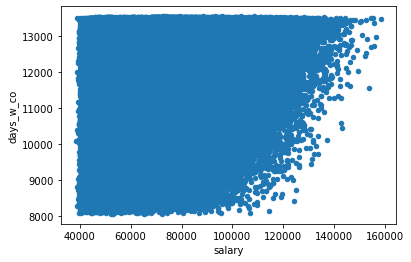

In [39]:
salaries.plot.scatter(x = 'salary', y = 'days_w_co')

In [40]:
x = salaries.salary
y = salaries.days_w_co

In [41]:
r, p = stats.pearsonr(x, y)
r, p

(0.30646256131860894, 0.0)

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [42]:
titles = pd.read_sql('''
SELECT COUNT(t.title) as num_titles, DATEDIFF(date(now()), e.hire_date) as days_w_co
FROM titles t
JOIN employees e
USING(emp_no)
GROUP BY e.emp_no
''', url)
titles.head()

,num_titles,days_w_co
0,1,13021
1,1,13238
2,1,12958
3,2,12863
4,2,11847


<AxesSubplot:xlabel='num_titles', ylabel='days_w_co'>

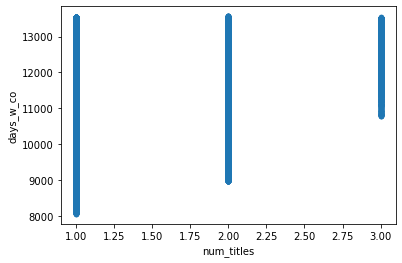

In [43]:
titles.plot.scatter(x = 'num_titles', y = 'days_w_co')

In [44]:
x = titles.num_titles
y = titles.days_w_co

In [45]:
r, p = stats.pearsonr(x, y)
r, p

(0.2665989299136427, 0.0)

Problem 3: Use the sleepstudy data. Is there a relationship between days and reaction time?

In [47]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

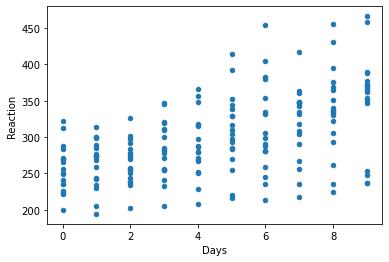

In [49]:
sleep.plot.scatter(x = 'Days', y = 'Reaction')

In [50]:
x = sleep.Days
y = sleep.Reaction

In [51]:
r, p = stats.pearsonr(x, y)
r, p

(0.5352302262650253, 9.894096322214812e-15)

# Chi Square Exercises:

Problem 1: Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

| | Codeup Student | Not Codeup Student |
| :- | :-: | :-: |
| Uses a Macbook | 49 | 20
| Doesn't Use A Macbook | 1 | 30 |

Problem 2: Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

Problem 3: Use the data from the employees database to answer these questions:
Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager

# More Exercises: 
Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.